# **Chapter 5. 머신러닝(Machine Learning) 기초** 





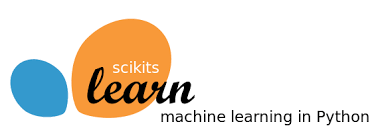


---
### **학습 목표**
> 5-1. 머신 러닝 개요 <br>
> 5-2. sklearn 이란? <br>
> 5-3. 전처리 기본 (정규화, 표준화, 범주형 데이터, 학습/테스트 세트 분할) <br>
> 5-4. 분류 분석 모델링 <br>
> **5-5. 분류 성능 평가하기** <br>
> 5-6. 회귀 분석 모델링 <br>
> 5-7. 회귀 성능 평가하기 <br>
> 5-8. 앙상블 모델링 <br>
> 5-9. 하이퍼파라미터(hyper-parameter) 튜닝 <br>
> 5-10. 비지도 군집화 분석

## 5-5. 분류 성능 평가하기
> - 이번 시간에는 지난 시간에서 사용한 평가 지표 **정확도 (Accuracy)** 외에도
> - scikit-learn 이 제공하는 **다양한 분류 성능을 평가하기 위한 방법**들을 알아보겠습니다.

In [1]:
# 라이브러리 불러오기
import matplotlib.pylab as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [2]:
# 실습 데이터 세트 로드 (펭귄 데이터)
penguins = sns.load_dataset("penguins")

# 결측값 제거
penguins = penguins.dropna().reset_index(drop=True)

In [3]:
## 이전 강의에서 다룬 내용 (전처리, 모델 학습, 예측)
from sklearn.preprocessing import MinMaxScaler  
from sklearn.preprocessing import LabelEncoder  
from sklearn.model_selection import train_test_split  
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

scaler = MinMaxScaler() # 스케일러 정의

features = penguins[['bill_length_mm','bill_depth_mm','flipper_length_mm','body_mass_g']]    # 정규화 대상 컬럼
features_normed = scaler.fit_transform(features)    # 정규화 

# 정규화 된 데이터로 바꿔주기
penguins = penguins.assign(bill_length_mm = features_normed[:,0],
                            bill_depth_mm = features_normed[:,1],
                            flipper_length_mm = features_normed[:,2],
                            body_mass_g = features_normed[:,3])

encoder = LabelEncoder() # 인코더 정의

features = penguins[['species', 'island', 'sex']]    # 인코딩 대상 컬럼
encoded = features.apply(encoder.fit_transform)    # 인코딩 실행 

# 수치형 데이터로 바꿔주기
penguins = penguins.assign(species = encoded['species'],
                            island = encoded['island'],
                            sex = encoded['sex'])


X = penguins.drop('sex', axis=1)  # 예측에 사용할 변수 
Y = penguins['sex']               # 예측할 변수

# 학습 / 테스트 세트 분할
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, shuffle=True)

lr_model = LogisticRegression(verbose=0)
lr_model.fit(X_train, Y_train)    # 모델 학습

# 수컷(Male) : 1, 암컷(Female) : 0
predictions = lr_model.predict(X_test)

# 성능 평가
acc = accuracy_score(Y_test, predictions)
print('Logistic Regression 모델의 예측 정확도는 {}% 입니다.'.format(round(acc*100)))

Logistic Regression 모델의 예측 정확도는 87% 입니다.


> 과연 위에 나온 정확도 하나만으로 **"이 머신 러닝 모델은 성능이 좋은 모델이다!"** 라고 말하기에 충분할까요? <br>
> 만약 아래 그림과 같이 90% 펭귄이 수컷인 상황이라면 **모두 수컷이라고 예측해도 정확도는 90%**가 됩니다. <br>
> 따라서 항상 모델의 **정확도만을 가지고 분류 성능을 평가하는 것에는 주의**가 필요합니다!

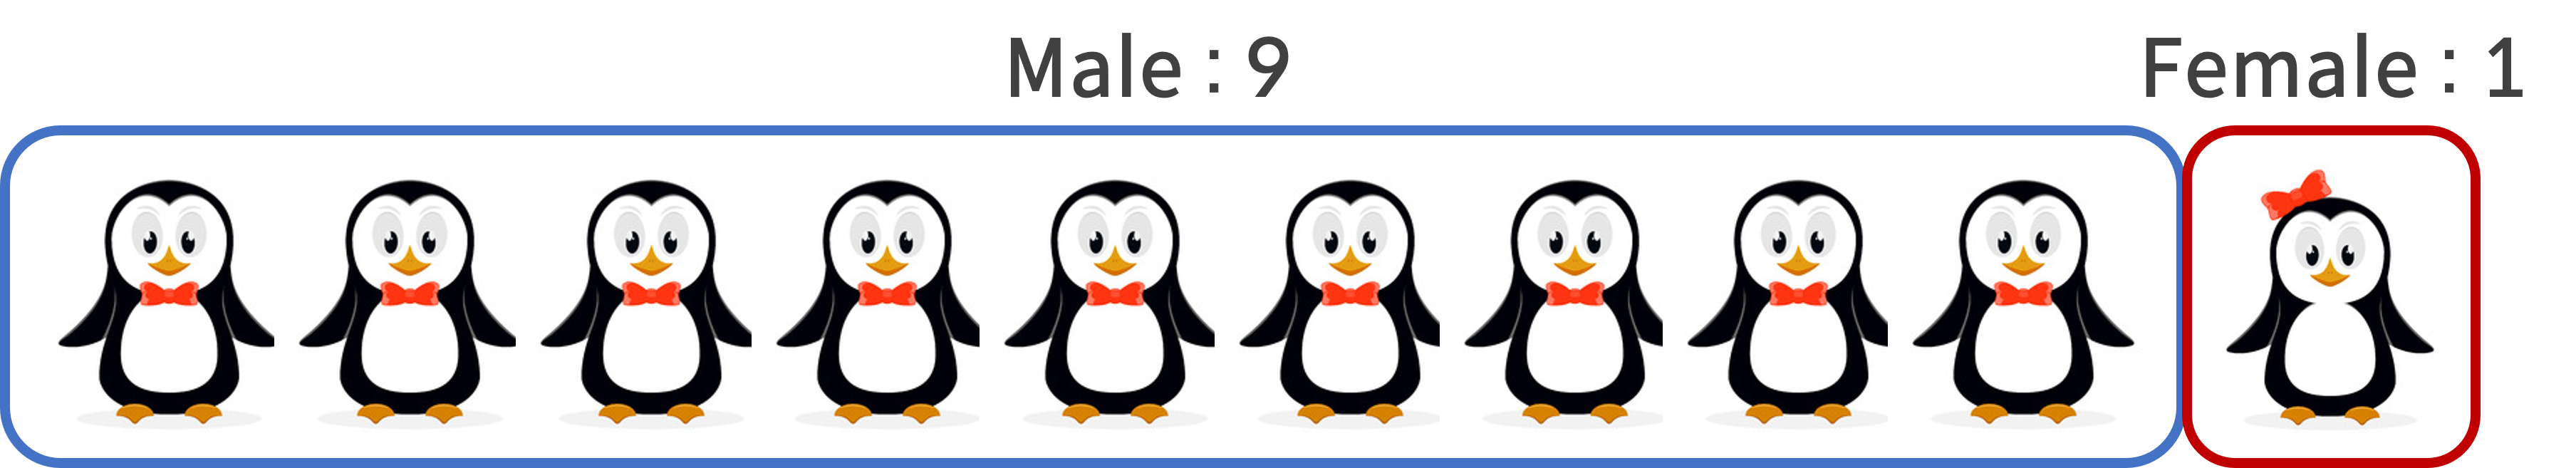

> ###  **5-5-1. 오차 행렬 (Confusion Matrix)**
> - 분류를 하면서 **모델이 얼마나 헷갈리고 있는지**를 한눈에 파악할 수 있습니다.
> - 실제 값 종류 별로 얼마나 맞추었는지, 아니면 얼마나 틀렸는지를 알 수 있어, **예측 오류의 종류 별로 분석**이 가능합니다.


> 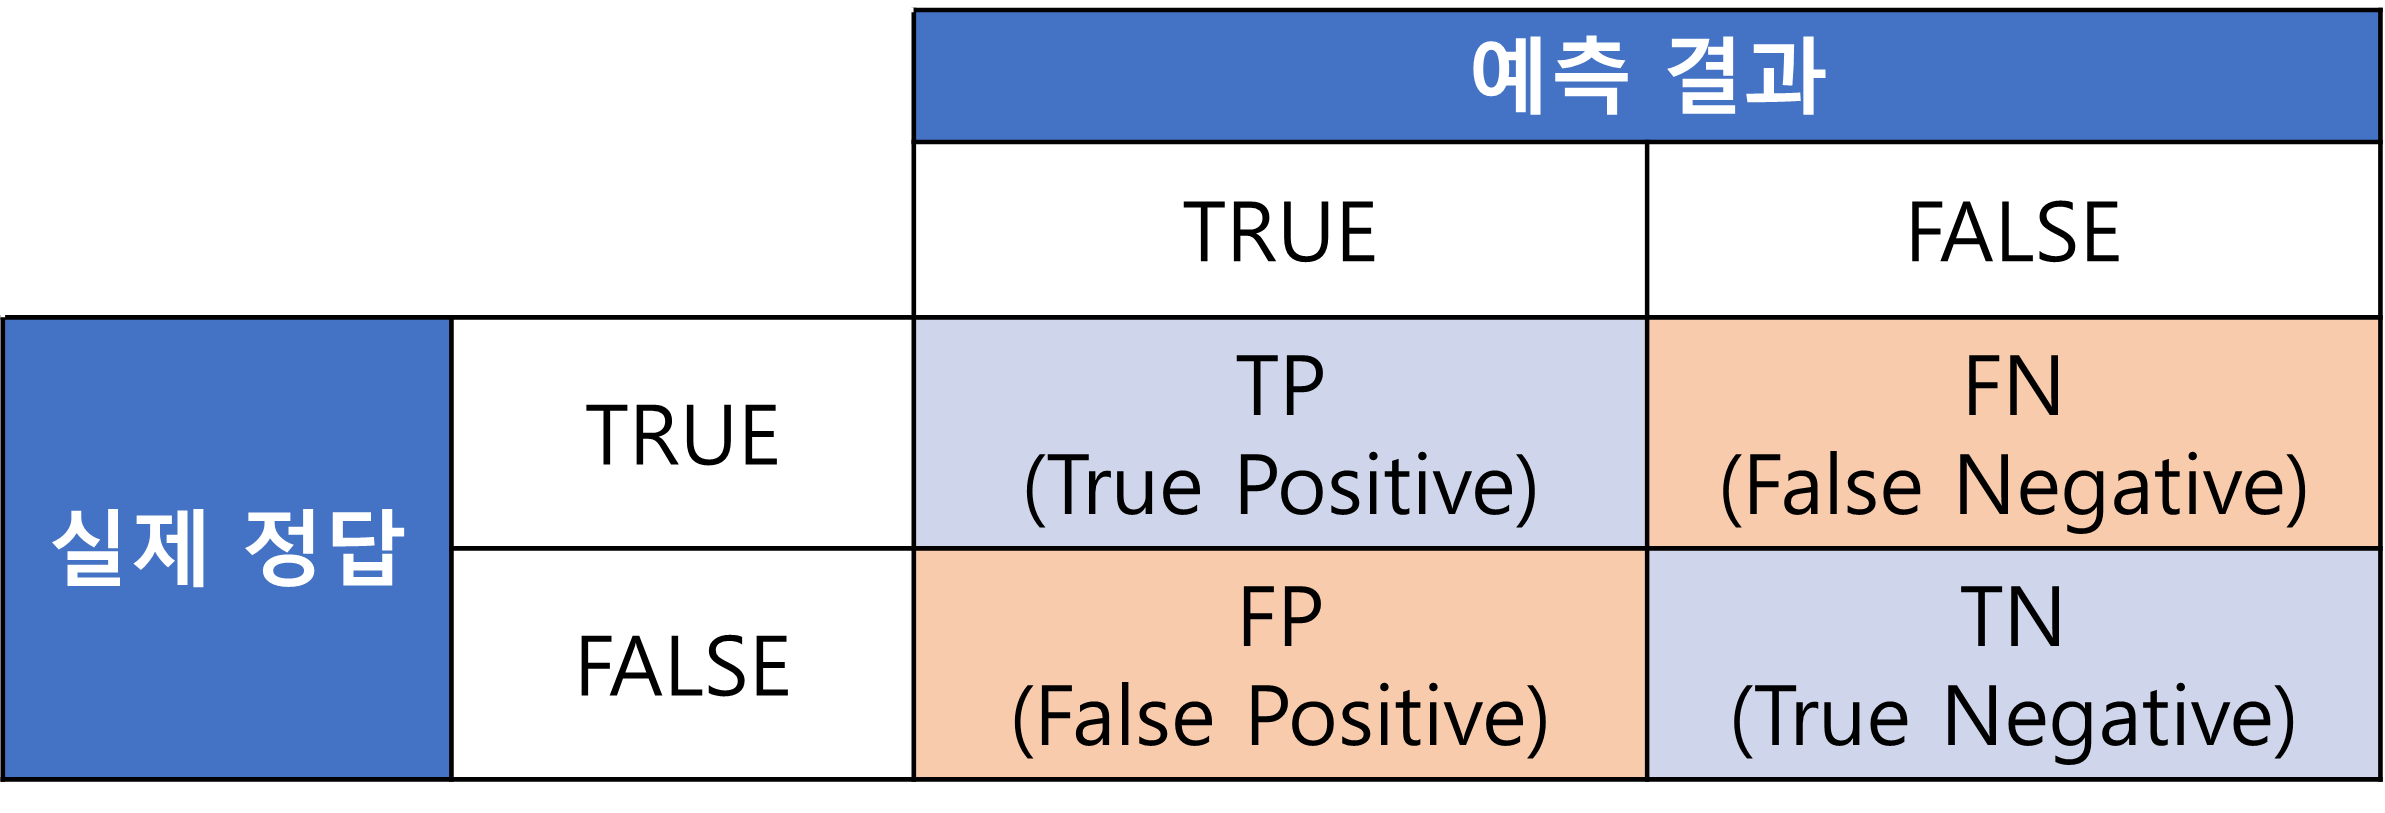

In [ ]:
# 라이브러리 로딩
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

In [ ]:
# 수컷(Male) : 1, 암컷(Female) : 0
predictions = lr_model.predict(X_test)

In [ ]:
# confusion matrix
cnf_matrix = confusion_matrix(Y_test, predictions)

In [ ]:
cnf_matrix

array([[29,  4],
       [ 0, 34]])

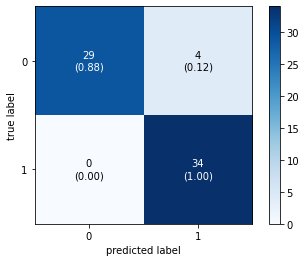

In [ ]:
# Confusion Matrix 시각화 하기
figure, ax = plot_confusion_matrix(conf_mat = cnf_matrix,   # confusion matrix
                                   show_absolute = True,    # 절대값 보여주기
                                   show_normed = True,      # 비율 보여주기
                                   colorbar = True)

plt.show()

> ###  **5-5-2. 정확도 (Accuracy) / 정밀도 (Precision)**
> - 정확도와 정밀도는 항상 헷갈리지만, 함께 봐야하는 중요한 지표 중 하나입니다.
> - scikit-learn 에선 0-1 사이 값으로 계산해 줍니다.
> - **정확도 (Accuracy)** : "전체 분류 결과 중"에서 "실제 참으로 맞춘 비율"
    - 전체 데이터에서 얼마나 맞췄는가?
    -  TP + TN / TP + FP + TN + FN
> - **정밀도 (Precision)** : "참으로 분류한 것 중"에 "실제 참의 비율"
    - 얼마나 정밀하게 참으로 분류했는가?
    - TP / TP + FP


In [ ]:
# 라이브러리 로딩
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score

In [ ]:
# 정확도
accuracy_score(Y_test, predictions)

0.9402985074626866

In [ ]:
# 정밀도
precision_score(Y_test, predictions)

0.8947368421052632

> ###  **5-5-3. 재현율 (Recall)**
> - 이름 부터 생소한 재현율(Recall) 은 Hit Ratio 등으로도 불리는 지표입니다. 
> - 정밀도와 개념이 유사하지만, 다른 점은 분모 부분이 '실제 참 값'이 들어갑니다.
> - scikit-learn 에선 0-1 사이 값으로 계산해 줍니다.
> - **재현율 (Recall)** : "실제 참값 중"에서 "참으로 분류한 비율"
    - 참 값을 얼마나 잘 재현해 내었는가?
    - TP / TP + FN


In [ ]:
# 라이브러리 로딩
from sklearn.metrics import recall_score

In [ ]:
# 재현율
recall_score(Y_test, predictions)

1.0

> ###  **5-5-4. F1 점수 (F1-score)**
> - F1-score 는 **재현율(recall) 과 정밀도(precision) 가 한쪽으로 치우치지 않았는지** 나타내는 지표입니다.
> - **재현율과 정밀도는 한쪽이 높아지면, 다른쪽이 낮아지는 관계** (Trade-off 관계) 가 있습니다. 만약 정밀도를 높이려 하면 재현율이 낮아집니다.
> - 주로 **데이터가 심각한 불균형 상태일 때** 성능 평가를 제대로 하기 위해 **사용**합니다.
> - **F1 점수 (Recall)** : "데이터 불균형을 보정한 분류 성능"
    - 데이터가 불균형한 상태에서도 얼마나 잘 맞추었는가?
    - 2 x Precision x Recall / Precision + Recall

In [ ]:
# 라이브러리 로딩
from sklearn.metrics import f1_score

In [ ]:
# f1 점수
f1_score(Y_test, predictions)

0.9444444444444444

> ###  **5-5-5. ROC (Receiver Operator Characteristic) 커브**
> - ROC 커브는 **분류 모델의 판단 기준을 연속적으로 바꾸면서 성능에 어떤 변화가 있는지 측정**하는 방법입니다.
> - **TPR (True Positive Rate)** : 참 값에 대해 참으로 바로 예측하는 비율
    - TP / TP + FN
> - **FPR (False Positive Rate)** : 거짓 값에 대해 참으로 틀리게 예측하는 비율
    - FP / FP + TN
> - 커브 아래 면적을 **AUC (Area under the ROC curve)** 라고 합니다.
> - 이 **AUC 면적이 클 수록 분류 성능이 좋은 모델**이라 평가합니다.

> 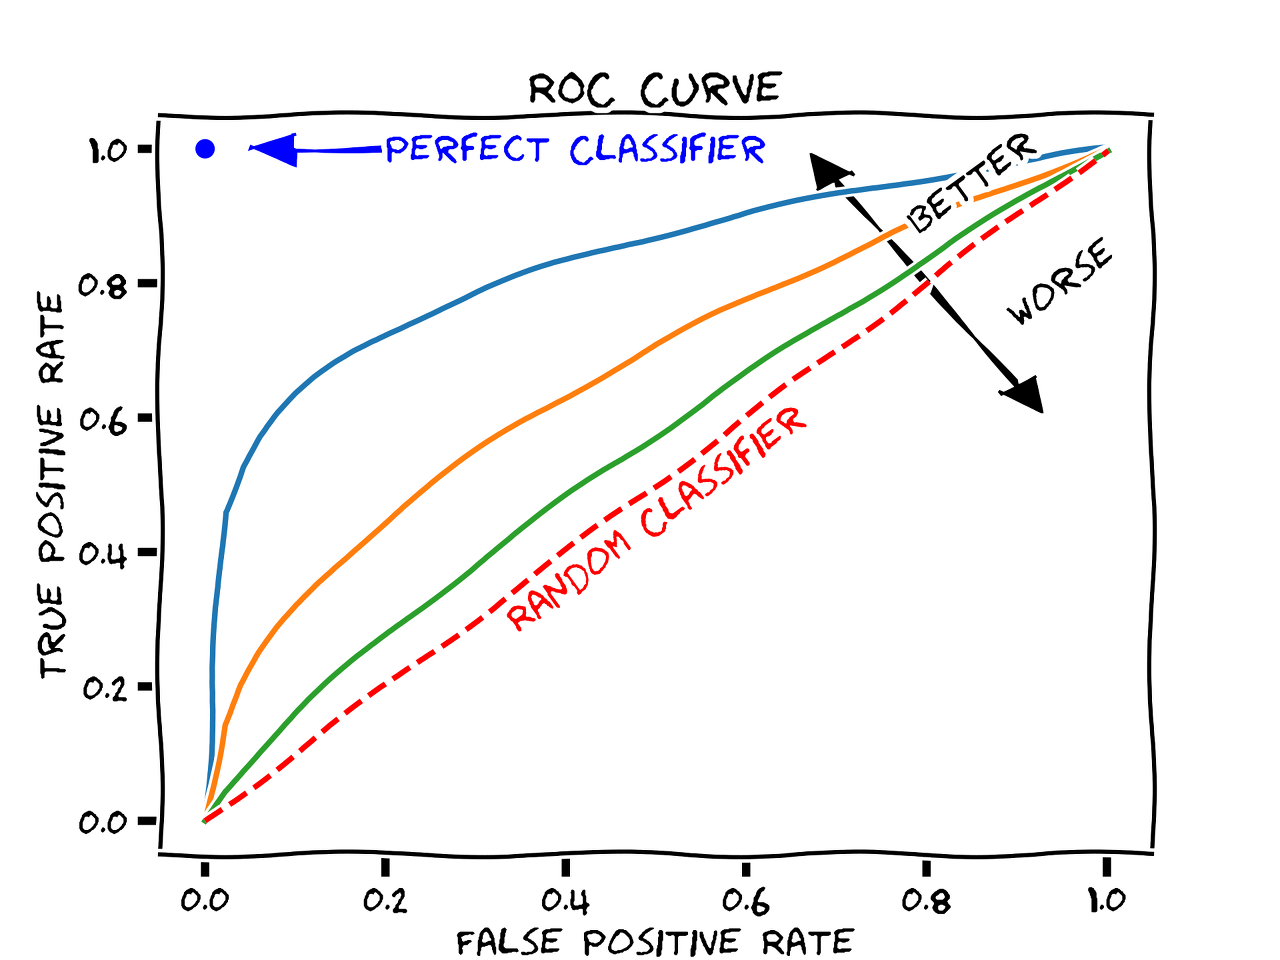

In [ ]:
# 라이브러리 로딩
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

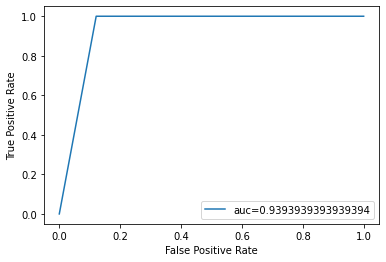

In [ ]:
# ROC 커브 시각화
fpr, tpr, _ = roc_curve(Y_test, predictions)
auc = roc_auc_score(Y_test, predictions)
plt.plot(fpr,tpr, label="auc="+str(auc))
plt.legend(loc='lower right')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

> **전체 분류 모델 성능 지표**

In [ ]:
accuracy = accuracy_score(Y_test, predictions)
precision = precision_score(Y_test, predictions)
recall = recall_score(Y_test, predictions)
f1_score = f1_score(Y_test, predictions)
auc_score = roc_auc_score(Y_test, predictions)

print("accuracy: {}".format(round(accuracy, 2)))
print("precision: {}".format(round(precision, 2)))
print("recall: {}".format(round(recall), 2))
print("f1_score: {}".format(round(f1_score, 2)))
print("auc_score: {}".format(round(auc_score, 2)))

accuracy: 0.94
precision: 0.89
recall: 1
f1_score: 0.94
auc_score: 0.94
